In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Indian diab.csv')

# Display the first few rows of the data
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Sigmoid based on glucose 

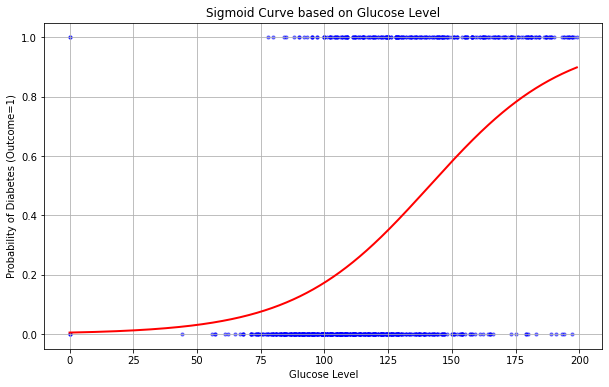

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Extracting the Glucose feature and the Outcome
X = df['Glucose'].values.reshape(-1, 1)
y = df['Outcome']

# Fitting a logistic regression model
clf = LogisticRegression()
clf.fit(X, y)

# Predicting probabilities
X_test = np.linspace(start=min(X), stop=max(X), num=1000).reshape(-1, 1)
y_prob = clf.predict_proba(X_test)[:, 1]

# Plotting the sigmoid curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, s=10)
plt.plot(X_test, y_prob, color='red', linewidth=2)
plt.title('Sigmoid Curve based on Glucose Level')
plt.xlabel('Glucose Level')
plt.ylabel('Probability of Diabetes (Outcome=1)')
plt.grid(True)
plt.show()


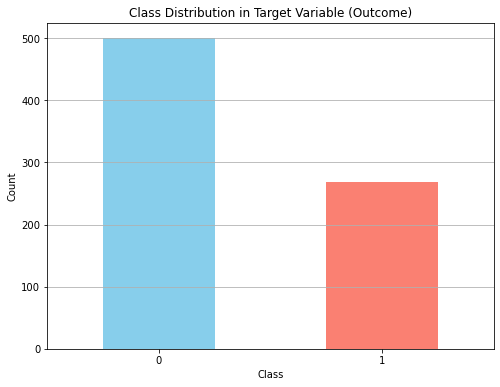

In [4]:
# Class distribution in the target variable
classdistribution = df['Outcome'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
classdistribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution in Target Variable (Outcome)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% training, 20% testing)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape


((614, 8), (154, 8))

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import time

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier()
}

# Parameters to store results
cv_means = {}
cv_stds = {}
train_times = {}
test_accuracies = {}
test_precisions = {}
test_recalls = {}
test_roc_aucs = {}

# Train each model with k-fold cross-validation
k = 5
for name, model in models.items():
    # Compute cross-validated accuracy and record the time taken
    start_time = time.time()
    cv_scores = cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy')
    end_time = time.time()
    
    # Store the results
    cv_means[name] = np.mean(cv_scores)
    cv_stds[name] = np.std(cv_scores)
    train_times[name] = end_time - start_time
    
    # Train the model on full training data and evaluate on test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracies[name] = accuracy_score(y_test, y_pred)
    test_precisions[name] = precision_score(y_test, y_pred)
    test_recalls[name] = recall_score(y_test, y_pred)
    test_roc_aucs[name] = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

results = {
    'CV Mean Accuracy': cv_means,
    'CV Std Accuracy': cv_stds,
    'Training Time (s)': train_times,
    'Test Accuracy': test_accuracies,
    'Test Precision': test_precisions,
    'Test Recall': test_recalls,
    'Test ROC AUC': test_roc_aucs
}

results_df = pd.DataFrame(results)
results_df


,CV Mean Accuracy,CV Std Accuracy,Training Time (s),Test Accuracy,Test Precision,Test Recall,Test ROC AUC
Logistic Regression,0.765507,0.027605,0.107051,0.746753,0.637931,0.672727,0.812856
SVM,0.752446,0.026483,0.183628,0.766234,0.720930,0.563636,0.806612
Decision Tree,0.721458,0.044615,0.021229,0.759740,0.640625,0.745455,0.756566


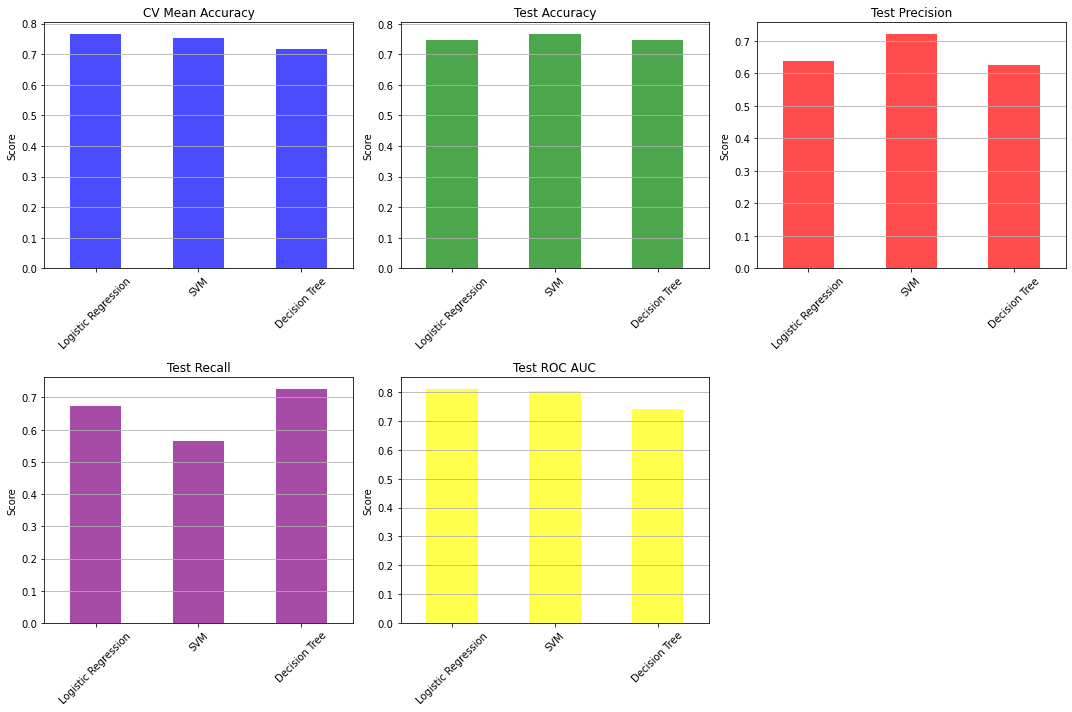